In [0]:
import keras
import pandas as pd
from keras.datasets import mnist
import matplotlib.pyplot as mpl
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

Loading Dataset

In [2]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()
print('Dataset Loaded')

11493376/11490434 [==============================] - 2s 0us/step
Dataset Loaded


Exploratory Analysis

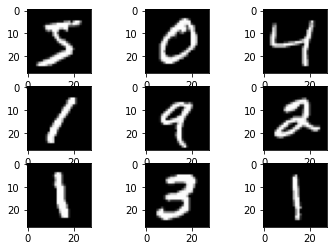

(28, 28)
5


In [3]:
for i in range(9):
  mpl.subplot(330+1+i)
  mpl.imshow(xtrain[i], cmap=mpl.get_cmap('gray'))
mpl.show()

print(xtrain[0].shape)
print(ytrain[0])

In [4]:
print(xtrain[0].shape)
print(ytrain[0])
print(len(xtrain))
print(len(xtest))

(28, 28)
5
60000
10000


In [5]:
new=[]
for i in range(len(xtrain)):
  new.append(xtrain[i].flatten())
train_df=pd.DataFrame(new)
new=[]
for i in range(len(xtest)):
  new.append(xtest[i].flatten())
test_df=pd.DataFrame(new)
print(train_df.shape)
print(test_df.shape)
print(ytrain.shape)

(60000, 784)
(10000, 784)
(60000,)


In [13]:
ytrain=to_categorical(ytrain)
print(ytrain)
print(ytrain.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 10)


Model ANN

In [25]:
ann=Sequential()
ann.add(Dense(128,activation='relu'))
ann.add(Dense(64,activation='relu'))
ann.add(Dense(128,activation='relu'))
ann.add(Dense(128,activation='relu'))
ann.add(Dense(32,activation='relu'))
ann.add(Dense(10,activation='softmax'))
ann.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print('Model ready')

Model ready


Model training

In [26]:
history=ann.fit(train_df,ytrain,batch_size=10,epochs=50)

Epoch 1/50
60000/60000 [==============================] - 28s 471us/step - loss: 0.4687 - accuracy: 0.8807
Epoch 2/50
60000/60000 [==============================] - 28s 475us/step - loss: 0.2101 - accuracy: 0.9452
Epoch 3/50
60000/60000 [==============================] - 27s 452us/step - loss: 0.1639 - accuracy: 0.9587
Epoch 4/50
60000/60000 [==============================] - 28s 460us/step - loss: 0.1375 - accuracy: 0.9654
Epoch 5/50
60000/60000 [==============================] - 27s 453us/step - loss: 0.1218 - accuracy: 0.9694
Epoch 6/50
60000/60000 [==============================] - 27s 452us/step - loss: 0.1103 - accuracy: 0.9729
Epoch 7/50
60000/60000 [==============================] - 27s 446us/step - loss: 0.1031 - accuracy: 0.9747
Epoch 8/50
60000/60000 [==============================] - 27s 454us/step - loss: 0.0957 - accuracy: 0.9766
Epoch 9/50
60000/60000 [==============================] - 27s 448us/step - loss: 0.0941 - accuracy: 0.9780
Epoch 10/50
60000/60000 [============

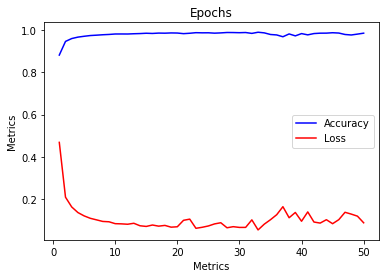

In [27]:
acc=history.history['accuracy']
loss=history.history['loss']
epochs=range(1,len(acc)+1)

mpl.plot(epochs,acc,'b',label='Accuracy')
mpl.plot(epochs,loss,'r',label='Loss')
mpl.title('Epochs')
mpl.ylabel('Metrics')
mpl.xlabel('Metrics')
mpl.legend()
mpl.show()

In [28]:
pred=ann.predict_classes(test_df)

correct=0
for i in range(len(ytest)):
  if pred[i]==ytest[i]:
    correct+=1
print(correct,' out of ',len(ytest),' total')
print('Accuracy on Test-set: ',round((correct/len(ytest))*100),'%')

9681  out of  10000  total
Accuracy on Test-set:  97 %
